# Example Q-Learning

* Author: Johannes Maucher
* Last update: 16.09.2021


This notebook demonstrates Q-Learning by an example, where an agent has to navigate from a start-state to a goal-state. The [Frozen Lake Environment](https://gym.openai.com/envs/FrozenLake-v0/)is provided by [Open AI gym](https://gym.openai.com)


## Environment

**Description:** (from [Frozen Lake](https://gym.openai.com/envs/FrozenLake-v0/))

*Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.*

As depicted below the environment consists of 16 states, indexed by 0 to 15 from the upper right to the lower left corner. There are 4 different types of states:

* S: Start (safe)
* F: Frozen (safe)
* H: Hole (Game lost)
* G: Goal (Game won)

The task is to find a policy for the agent to navigate efficiently from the Start (S) to the Goal (G) state. 

![Frozen Lake pic](https://maucher.home.hdm-stuttgart.de/Pics/FrozenWorld.png)

## Actions

The agent can move left (0), down (1), right (2) or up (3). If the agent moves to a wall it remains in the current state.

## Transition- and Reward-Model
In states `H` and `G` the game is over. In states `S` and `F` the transition modell is defined by:
* the probability that the agent actually moves in the direction, defined by the selected action is $1/3$.
* the probability that the agent moves to the field left-perpendicular to the direction given by the selected action is $1/3$.
* the probability that the agent moves to the field right-perpendicular to the direction given by the selected action is $1/3$.

The reward for turning into state `G` is 1. Turning in any other state yields no reward (r=0).

## Some functions of gym

In [1]:
#!pip install gym

In [2]:
import gym
import numpy as np
np.random.seed(123456)
np.set_printoptions(precision=4,suppress=True)

In [3]:
env = gym.make('FrozenLake-v1')

In [4]:
env.render(mode="human")


SFFF
FHFH
FFFH
HFFG


In [5]:
env.env.desc

array([[b'S', b'F', b'F', b'F'],
       [b'F', b'H', b'F', b'H'],
       [b'F', b'F', b'F', b'H'],
       [b'H', b'F', b'F', b'G']], dtype='|S1')

In [6]:
env.env.reward_range

(0, 1)

In [7]:
env.env.action_space

Discrete(4)

In [8]:
env.env.observation_space

Discrete(16)

In [9]:
env.observation_space.n

16

In [10]:
env.action_space.n

4

### Complete Environment-, Action-, Transition- and reward-model:

In [11]:
env.env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

In [12]:
start=0
targetDirection=1 # 0:left, 1:down, 2:right, 3:up
drift=1           # 0:drift to right, 1 no drift, 2: drift to left
env.env.P[start][targetDirection][drift]

(0.3333333333333333, 4, 0.0, False)

In [13]:
print("Probability for this drift: %1.3f"%env.env.P[start][targetDirection][drift][0])
print("New state: %2d"%env.env.P[start][targetDirection][drift][1])
print("Reward: %2.2f"%env.env.P[start][targetDirection][drift][2])
print("Game over?: %s"%env.env.P[start][targetDirection][drift][3])

Probability for this drift: 0.333
New state:  4
Reward: 0.00
Game over?: False


### Interaction with gym environment
Execute action and obtain new state and reward:

In [14]:
env.reset()
action=0
print("Old state: ",env.env.s)
s1,r,d,_=env.step(action) # s1 is new state, r is reward and d is True if game is over
print("New state: ",s1, "\t Reward: ",r, "\t Game Over?: ",d)

Old state:  0
New state:  0 	 Reward:  0.0 	 Game Over?:  False


In [15]:
env.reset()
d=False
while not d:
    print("-"*10)
    print("Old state: ",env.env.s)
    action=np.random.randint(4)
    print("Intended Action: ",action)
    s1,r,d,_=env.step(action) # s1 is new state, r is reward and d is True if game is over
    print("New state: ",s1, "\t Reward: ",r, "\t Game Over?: ",d)

----------
Old state:  0
Intended Action:  1
New state:  0 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  0
Intended Action:  2
New state:  1 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  1
Intended Action:  2
New state:  2 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  2
Intended Action:  1
New state:  3 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  3
Intended Action:  0
New state:  7 	 Reward:  0.0 	 Game Over?:  True


## Simple Q-Learning in Table Representation

In this section Q-learning, as defined in the pseudo code below is implemented:

![Q Learning Pseudo Code Image](https://maucher.home.hdm-stuttgart.de/Pics/QlearningPseudoCode.png)

Initialization and hyperparameter setting:

In [16]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .9   # parameter \alpha  
y = .95 #discount \nu
num_episodes = 2000

In [17]:
print("Initial Table of Q-values: \n",Q)

Initial Table of Q-values: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In the array above each row belongs to a state and each column belongs to an action. The entry in row i, column j is the $Q(s,a)$-value for the j.th action in the i.th state. Initially all these values are zero.

In [18]:
np.random.randn(1,env.action_space.n)

array([[0.9742, 0.7191, 0.1848, 0.6193]])

In the code-cell below Q-learning is implemented. Note that the action-selection, in particular the Explore/Exploit-Trade-Off, is implemented such that with an increasing number of episodes the random contribution to action-selection decreases: 

In [19]:
#create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        options=Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1))
        a = np.argmax(options)
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #print(s,a,s1)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)

In [20]:
print("Score over time: " +  str(sum(rList)/num_episodes))

Score over time: 0.562


### Learned Policy

Final $Q(s_t,a_t)$-values:

In [21]:
Q

array([[0.1599, 0.0009, 0.0009, 0.0011],
       [0.0001, 0.0003, 0.0001, 0.0882],
       [0.1588, 0.0014, 0.0003, 0.0011],
       [0.    , 0.0011, 0.0011, 0.0462],
       [0.2731, 0.0001, 0.0001, 0.0001],
       [0.    , 0.    , 0.    , 0.    ],
       [0.0017, 0.0001, 0.0001, 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.0009, 0.0006, 0.    , 0.6112],
       [0.    , 0.1364, 0.    , 0.0001],
       [0.0228, 0.0006, 0.0008, 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.0042, 0.0006, 0.6018, 0.0013],
       [0.    , 0.6709, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

For each state (row in the array above) the action of the learned strategy is the positon with the maximal value in the corresponding row: 

In [22]:
strategy=np.argmax(Q,axis=1)

In [23]:
strategy

array([0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0])

In [24]:
actionList=["Left","Down","Right","Up"]
for state in strategy:
    print("Best action in state %2d is %2s"%(state,strategy[state]))

Best action in state  0 is  0
Best action in state  3 is  3
Best action in state  0 is  0
Best action in state  3 is  3
Best action in state  0 is  0
Best action in state  0 is  0
Best action in state  0 is  0
Best action in state  0 is  0
Best action in state  3 is  3
Best action in state  1 is  3
Best action in state  0 is  0
Best action in state  0 is  0
Best action in state  0 is  0
Best action in state  2 is  0
Best action in state  1 is  3
Best action in state  0 is  0


In [25]:
env.reset()
d=False
while not d:
    print("-"*10)
    print("Old state: ",env.env.s)
    #action=np.random.randint(4)
    action=strategy[env.env.s]
    print("Intended Action: ",action)
    s1,r,d,_=env.step(action) # s1 is new state, r is reward and d is True if game is over
    print("New state: ",s1, "\t Reward: ",r, "\t Game Over?: ",d)

----------
Old state:  0
Intended Action:  0
New state:  0 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  0
Intended Action:  0
New state:  4 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  4
Intended Action:  0
New state:  0 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  0
Intended Action:  0
New state:  4 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  4
Intended Action:  0
New state:  0 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  0
Intended Action:  0
New state:  0 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  0
Intended Action:  0
New state:  4 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  4
Intended Action:  0
New state:  4 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  4
Intended Action:  0
New state:  0 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  0
Intended Action:  0
New state:  0 	 Reward:  0.0 	 Game Over?:  False
----------
Old state:  0
Intended Action:  0
New s

In [26]:
print("Game terminated with:")
print("Final state: ",s1, "\t Reward: ",r)

Game terminated with:
Final state:  15 	 Reward:  1.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [28]:
model = Sequential()
model.add(InputLayer(batch_input_shape=(1, 16)))
model.add(Dense(50, activation='sigmoid',use_bias=False))
model.add(Dense(4, activation='linear',use_bias=False))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [29]:
# now execute the q learning
y = 0.95
eps = 0.5
decay_factor = 0.999
num_episodes=5000
r_avg_list = []
for i in range(num_episodes):
    s = env.reset()
    eps *= decay_factor
    if i % 100 == 0:
        print("Episode {} of {}".format(i + 1, num_episodes))
    done = False
    r_sum = 0
    while not done:
        if np.random.random() < eps:
            a = np.random.randint(0, 4)
        else:
            a = np.argmax(model.predict(np.identity(16)[s:s + 1]))
        new_s, r, done, _ = env.step(a)
        target = r + y * np.max(model.predict(np.identity(16)[new_s:new_s + 1]))
        target_vec = model.predict(np.identity(16)[s:s + 1])[0]
        target_vec[a] = target
        model.fit(np.identity(16)[s:s + 1], target_vec.reshape(-1, 4), epochs=1, verbose=0)
        s = new_s
        r_sum += r
    r_avg_list.append(r_sum)

Episode 1 of 5000
Episode 101 of 5000
Episode 201 of 5000
Episode 301 of 5000
Episode 401 of 5000
Episode 501 of 5000
Episode 601 of 5000
Episode 701 of 5000
Episode 801 of 5000
Episode 901 of 5000
Episode 1001 of 5000
Episode 1101 of 5000
Episode 1201 of 5000
Episode 1301 of 5000
Episode 1401 of 5000
Episode 1501 of 5000
Episode 1601 of 5000
Episode 1701 of 5000
Episode 1801 of 5000
Episode 1901 of 5000
Episode 2001 of 5000
Episode 2101 of 5000
Episode 2201 of 5000
Episode 2301 of 5000
Episode 2401 of 5000
Episode 2501 of 5000
Episode 2601 of 5000
Episode 2701 of 5000
Episode 2801 of 5000
Episode 2901 of 5000
Episode 3001 of 5000
Episode 3101 of 5000
Episode 3201 of 5000
Episode 3301 of 5000
Episode 3401 of 5000
Episode 3501 of 5000
Episode 3601 of 5000
Episode 3701 of 5000
Episode 3801 of 5000
Episode 3901 of 5000
Episode 4001 of 5000
Episode 4101 of 5000
Episode 4201 of 5000
Episode 4301 of 5000
Episode 4401 of 5000
Episode 4501 of 5000
Episode 4601 of 5000
Episode 4701 of 5000
Epis

In [31]:
winrate=[np.sum(r_avg_list[:count])/count for count in range(len(r_avg_list))]

<ipython-input-31-454c3f8cd567>:1: RuntimeWarning: invalid value encountered in double_scalars
  winrate=[np.sum(r_avg_list[:count])/count for count in range(len(r_avg_list))]


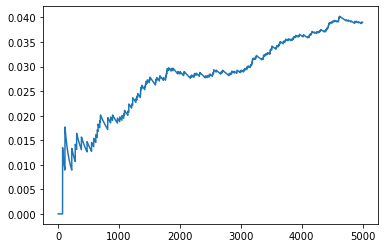

In [32]:
from matplotlib import pyplot as plt
plt.plot(np.arange(len(winrate)),winrate)
plt.show()

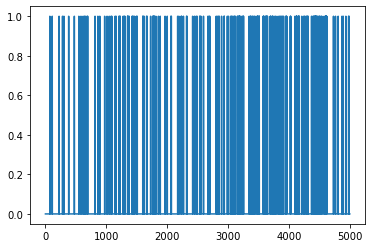

In [33]:
from matplotlib import pyplot as plt
plt.plot(np.arange(len(r_avg_list)),r_avg_list)
plt.show()